# TFSA vs Mortgage Comparison - a basic investment review w/ ChatGPT 4

I asked ChatGPT 4,

> I want to invest $10,000 and I have two options: a TFSA or my mortgage. generate an estimate of the return of each in the next 15 years using numbers that make sense. state your assumptions at the end.

here are its answers: https://chatgpt.com/share/00a8e131-73d6-43a2-a733-53b672c5d584 - the code in this notebook is generated in this chat.

more: <medium-url> 🔥

In [8]:
import os
os.environ["abcli_path_bash"] = "{}/git/awesome-bash-cli/bash".format(os.getenv("HOME"))

In [9]:
from abcli import fullname
from abcli import string
from abcli.modules import objects
from abcli.file.save import save_fig
from abcli.plugins import seed
from abcli.logger import logger

logger.info(f"{fullname()}, built on {string.pretty_date()}")

:: abcli-9.48.1, built on 31 May 2024, 19:08:57


In [3]:
object_name = f"fintech-{string.timestamp()}"
object_path = objects.object_path(object_name)

---

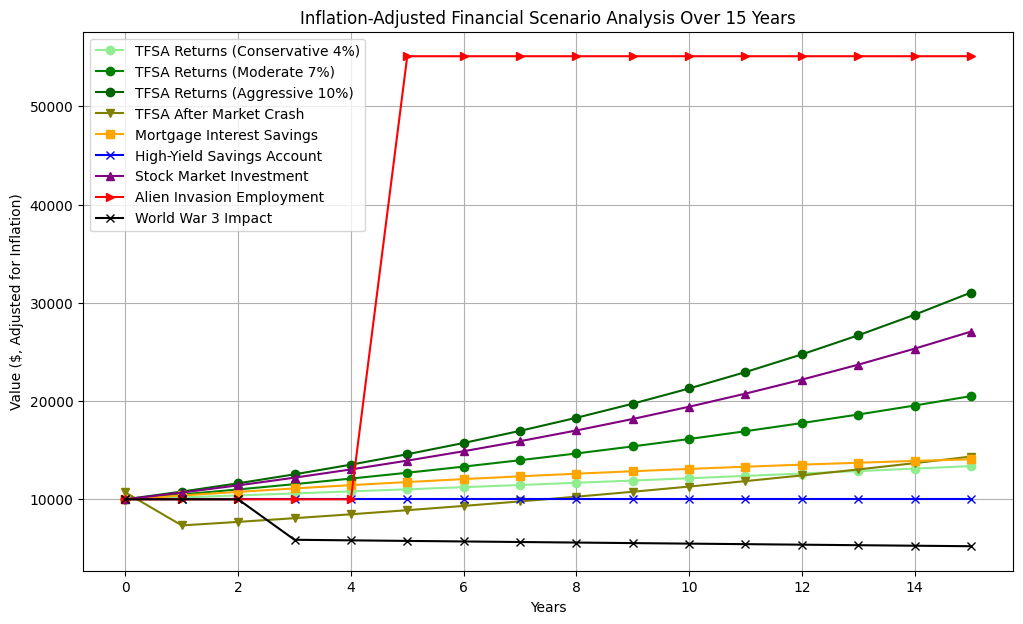

True

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Initial investment and years
initial_investment = 10000
years = np.arange(0, 16)
inflation_rate = 0.02

# TFSA investment scenarios with different growth rates
tfsa_values_conservative = initial_investment * (1 + 0.04) ** years
tfsa_values_moderate = initial_investment * (1 + 0.07) ** years
tfsa_values_aggressive = initial_investment * (1 + 0.10) ** years

# TFSA after a market crash scenario
tfsa_values_crash = np.zeros(len(years))
tfsa_values_crash[0] = initial_investment * (1 + 0.07)
tfsa_values_crash[1] = tfsa_values_crash[0] * (1 - 0.30)
for i in range(2, len(years)):
    tfsa_values_crash[i] = tfsa_values_crash[i - 1] * (1 + 0.07)

# Mortgage interest savings
mortgage_savings_values = np.linspace(initial_investment, initial_investment + 8944.51, num=len(years))

# High-yield savings and stock market investments
high_yield_savings = initial_investment * (1 + 0.02) ** years
stock_market_investment = initial_investment * (1 + 0.09) ** years

# Alien invasion employment scenario
alien_invasion_employment = np.zeros(len(years))
alien_invasion_employment[:5] = initial_investment * (1 + 0.02) ** np.arange(5)
alien_invasion_employment[5:] = (alien_invasion_employment[4] + 50000) * (1 + 0.02) ** np.arange(len(years) - 5)

# World War 3 impact scenario
world_war_3 = np.zeros(len(years))
world_war_3[:3] = initial_investment * (1 + 0.02) ** np.arange(3)
world_war_3[3:] = world_war_3[2] * 0.60
world_war_3[3:] = world_war_3[3] * (1 + 0.01) ** np.arange(len(years) - 3)

# Inflation adjustment
def adjust_for_inflation(values):
    return values / ((1 + inflation_rate) ** years)

# Applying inflation adjustment
scenarios = [tfsa_values_conservative, tfsa_values_moderate, tfsa_values_aggressive, tfsa_values_crash, 
             mortgage_savings_values, high_yield_savings, stock_market_investment, alien_invasion_employment, world_war_3]
labels = ['TFSA Returns (Conservative 4%)', 'TFSA Returns (Moderate 7%)', 'TFSA Returns (Aggressive 10%)', 
          'TFSA After Market Crash', 'Mortgage Interest Savings', 'High-Yield Savings Account', 
          'Stock Market Investment', 'Alien Invasion Employment', 'World War 3 Impact']
colors = ['lightgreen', 'green', 'darkgreen', 'olive', 'orange', 'blue', 'purple', 'red', 'black']
markers = ['o', 'o', 'o', 'v', 's', 'x', '^', '>', 'x']

# Plotting the scenarios
plt.figure(figsize=(12, 7))
for values, label, color, marker in zip(scenarios, labels, colors, markers):
    plt.plot(years, adjust_for_inflation(values), label=label, marker=marker, color=color)

plt.title('Inflation-Adjusted Financial Scenario Analysis Over 15 Years')
plt.xlabel('Years')
plt.ylabel('Value ($, Adjusted for Inflation)')
plt.grid(True)
plt.legend()
plt.show()
save_fig(objects.path_of("summary.png", object_name))

---

In [5]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/abcli/.abcli/abcli.sh in_notebook

object_name=$1

abcli select $object_name
abcli tag set . built_by_notebook,fintech
abcli upload

📜 awesome-bash-cli: .env: 22 env var(s)
📜 awesome-bash-cli: abcli/config.env: 13 env var(s)
🔋 gpu: not found.
🚀 abcli-9.48.1.current
📂 object :: fintech-2024-05-31-19-08-31-54583


:: fintech-2024-05-31-19-08-31-54583 += #built_by_notebook.
:: fintech-2024-05-31-19-08-31-54583 += #fintech.


confirmed: fintech-2024-05-31-19-08-31-54583 does not exist.
fintech-2024-05-31-19-08-31-54583 open upload started.
upload: ./abcli.log to s3://kamangir/bolt/fintech-2024-05-31-19-08-31-54583/abcli.log
upload: ./summary.png to s3://kamangir/bolt/fintech-2024-05-31-19-08-31-54583/summary.png


:: fintech-2024-05-31-19-08-31-54583 += #open.


In [6]:
seed.log(object_name)

:: abcli select fintech-2024-05-31-19-08-31-54583; open .


In [7]:
# END